### Getting started - why is MLOP's important?

#### One example/problem while deployment is when the Model does well on test data but on production server an altogether unseen data comes. Also, in some cases the data distribution changes i.e there is a data drift.


#### What is MLOPs?

##### It is a systematic way to think about the entire Machine Learning Project Lifecycle starting from Scoping, Data, Model Building to Deployment.
##### and an understanding of the tools required to perform those stages.

It is an iterative process, where during a later stage we might go back to an earlier stage. (That’s why we call it a cycle--it’s a circular process.)


In [1]:
from IPython.display import Image

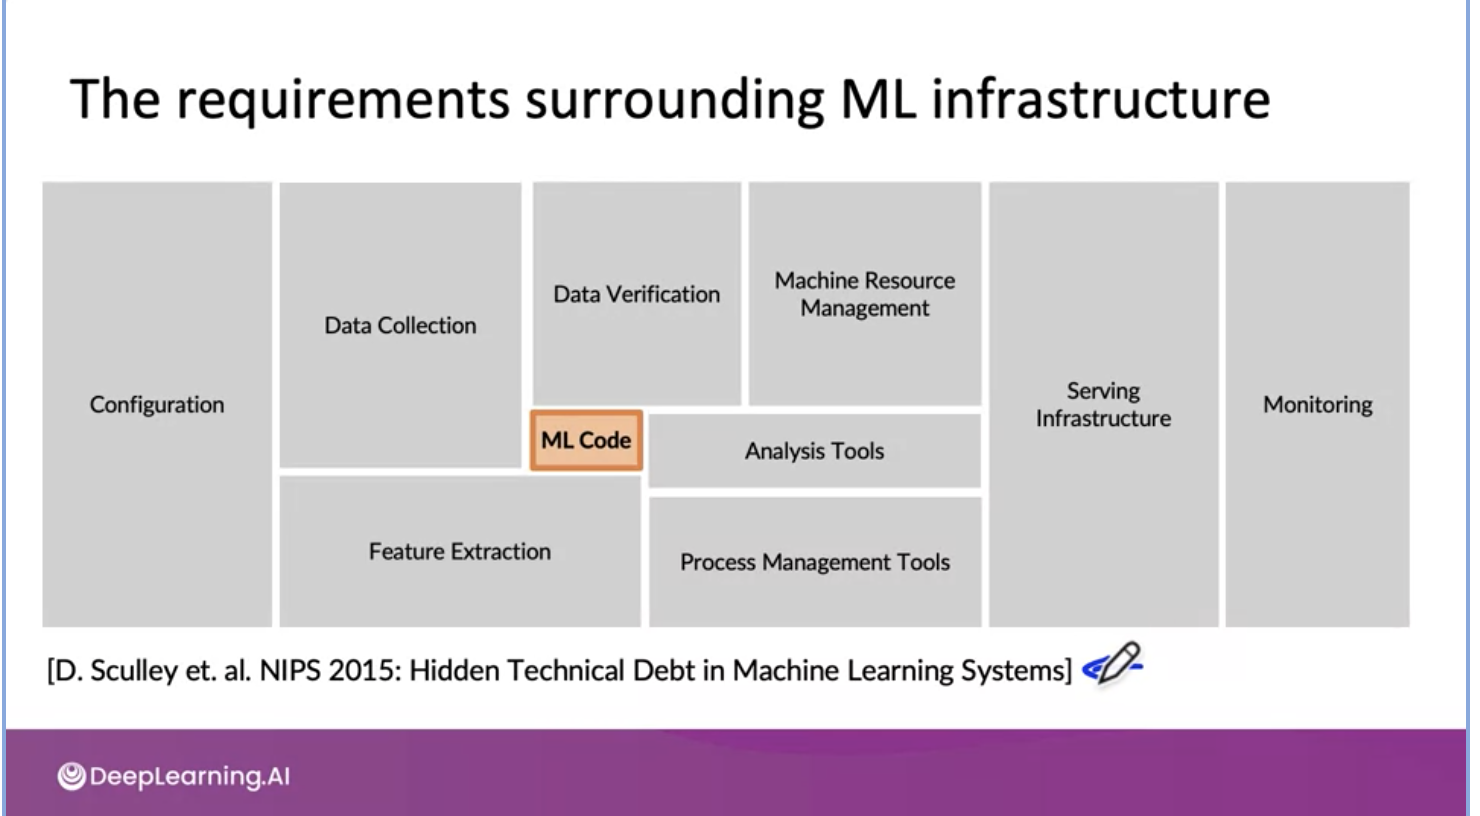

In [2]:
Image("MLInfra.png")

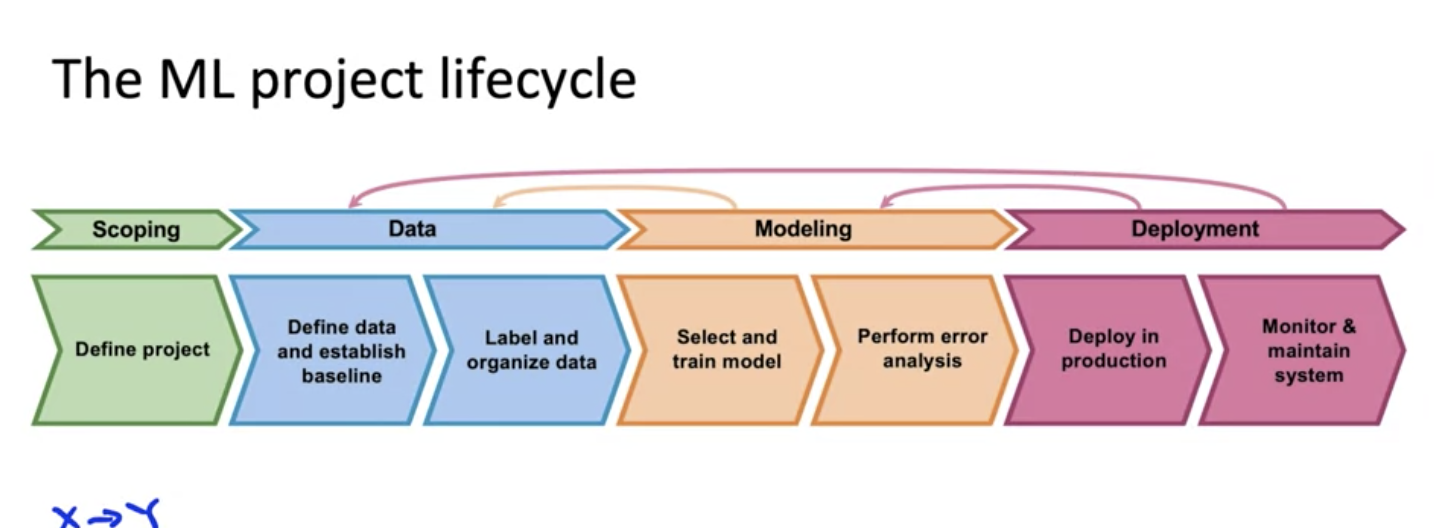

In [3]:

Image("Lifecycle.png")


| Scoping     | Data  | Select & Train Model | Perform error analysis    | Deploy in production | Monitor & maintain system    |
| ----------- | ----------- |----------- | ----------- |----------- | ----------- |
| Define the project and key metrics, key metrics vary from Project to Project   | Define Data      | Three Components: Code, Hyperparameter, Data     |Where the model falls short: Either model is corrected or we attempt to get more data       | Deployment    |Very important component     | 
| In Speech Recogn System, the metrics can be Latency, accuracy, cost & resources  | In Speech, Transcription - having consistency in labelling there, Volume normalization       | In Research, focus is more on Code & Hyperparameters, in Product the focus is more on the data.  |It is important to perform this step, to also know what kind of data the model requires.  | Varies from project to project - in Speech, you would have edge device, voice detection module, a Prediction server where transcription and search results are computed and then a frontend. |It is vital to detect Concept & Data Drift.   | 

#### Deployment:

##### 1. Writing the Software 

CHECKLIST:

- Realtime/Batch: Some prediction systems don't require Realtime E.g - Hospital records prediction can be run overnight.
- Cloud vs Edge/Browser:

Deployment on cloud has become easier with compute resources. However some speech sytems in Cars/Phones are deployed on edge to be able to work without internet. Even CV systems in Manufacturing are deployed on cloud to reduce dependence on internet since if there is an outage the factory would shut down.

Edge deployments are frequently constrained in computational power due to cost, size, and energy requirements of the hardware.

Advantages of Edge Deployment include lower latency, Can function even if network connection is down and 
Less network bandwidth needed.

- Compute Resources (CPU/GPU/Memory):

Sometimes while building the model and putting into production, it is possible that you are using high GPU but production system cannot work on it as it affect costs - so it is important to keep in mind.

- Latency/Throughput(QPS):

How quickly do you want the system to produce output?

- Logging:

It is required for Analysis Review and if you ever want to retrain model on newer data.

- Security & Privacy:

Important in cases where you have sensitive information and regulatory requirements.

##### 2. Monitor the System Performance - Data Drift & Concept Drift

- Data Drift Examples:

In Manufacturing, you have trained a model on a specific lighting data and the data suddenly changes because of lighting change.

In Speech System, for example the Microphone in the phone changes. In Speech, you may have purchased data and data from vendor and you test it on a more recent data.

Data Distribution Changes happen two ways:
1. Gradual Change
2. Very Sudden Change - For Example due to COVID-19, Fraud models were affected as people were shopping online more than they used to earliier.

Another terminology: Training-serving skew:

the model on trained on a cleaned data and does well on test but while productionalizing it does not do as well.


- Concept Drift:

When the definition of what is y given x changes.

In the Fraud example, the definition of identifying fraud changed after covid-19.
Another example is defining prices based off inflation/market rate.

1. Gradual Drift: no individual change is dramatic - each affects only a tiny segment
2. Sudden Drift: overnight changes like COVID


### Solutions to the Model Drifts above:

1. Retrain the model using all available data, both before and after the change.
2. Use everything, but assign higher weights to the new data so that model gives priority to the recent patterns.
3. If enough new data is collected, we can simply drop the past.


#### First Deployment & Maintenance

#### Deployment cases:

1. New Product/Capability - Gradually increase Traffic.
2. Automate/Assist with Manual Tasks - Eg. in manufacturing.
3. Replace Previous ML System.

Two important things to keep in mind while deployingg:
- Gradual Ramping up 
- Rollback possibility - if an older system exists.

Types of Deployment

1. Shadow Mode Deployment - the system shadows human and runs in parallel. This helps gather data on how the model is performing.

2. Canary Deployment - Adapted from the idiom - Canary in the Coal Mine meaning "Early Warning Signs", this deployment is exposing model to 5% traffic and reviewing while ramping up gradually.

3. Blue/Green Deployment - Enables rollback where blue is basically the old system and green is the new system. and you switch from blue to green either gradually or 100%. A blue green deployment diverts some or all of the system's traffic to the new ML system, which is used to make decisions.

##### Degrees of Automation:

When developing a system you slowly move from lowest degree to full automation. Depending on the use case/problem, you may not require full automation. For Example in manufacturing, partial automation is okay but in Speech recognition full automation is required.

- Human Only Automation
- Shadow Mode Automation
- AI Assistance - where the system is helping human. For ex. in Factory inspection, the system highlights affected region in a device.
- Partial automation - where if the algorithm is not sure of the prediction that case is sent to human.
- Full Automation

AI Assistance and Partial automation are types of Human in the Loop Deployment.




### Monitoring:

After deployment, you would want to monitor certain metrics which deppends on the use case. Some things to monitor could be:

1. Server Load - Eg. User Traffic suddenly increases.
2. Non Null Ouputs 
3. Fraction of Missing Input increasses.

How to go about defining the metrics?

- Brainstorm with team on what could go wrong?
- Start with lots of metrics, monitor and slowly come down to a few.

Types of Metrics:

1. Software Metricss
2. Input Metrics
3. Output Metrics




## Modeling

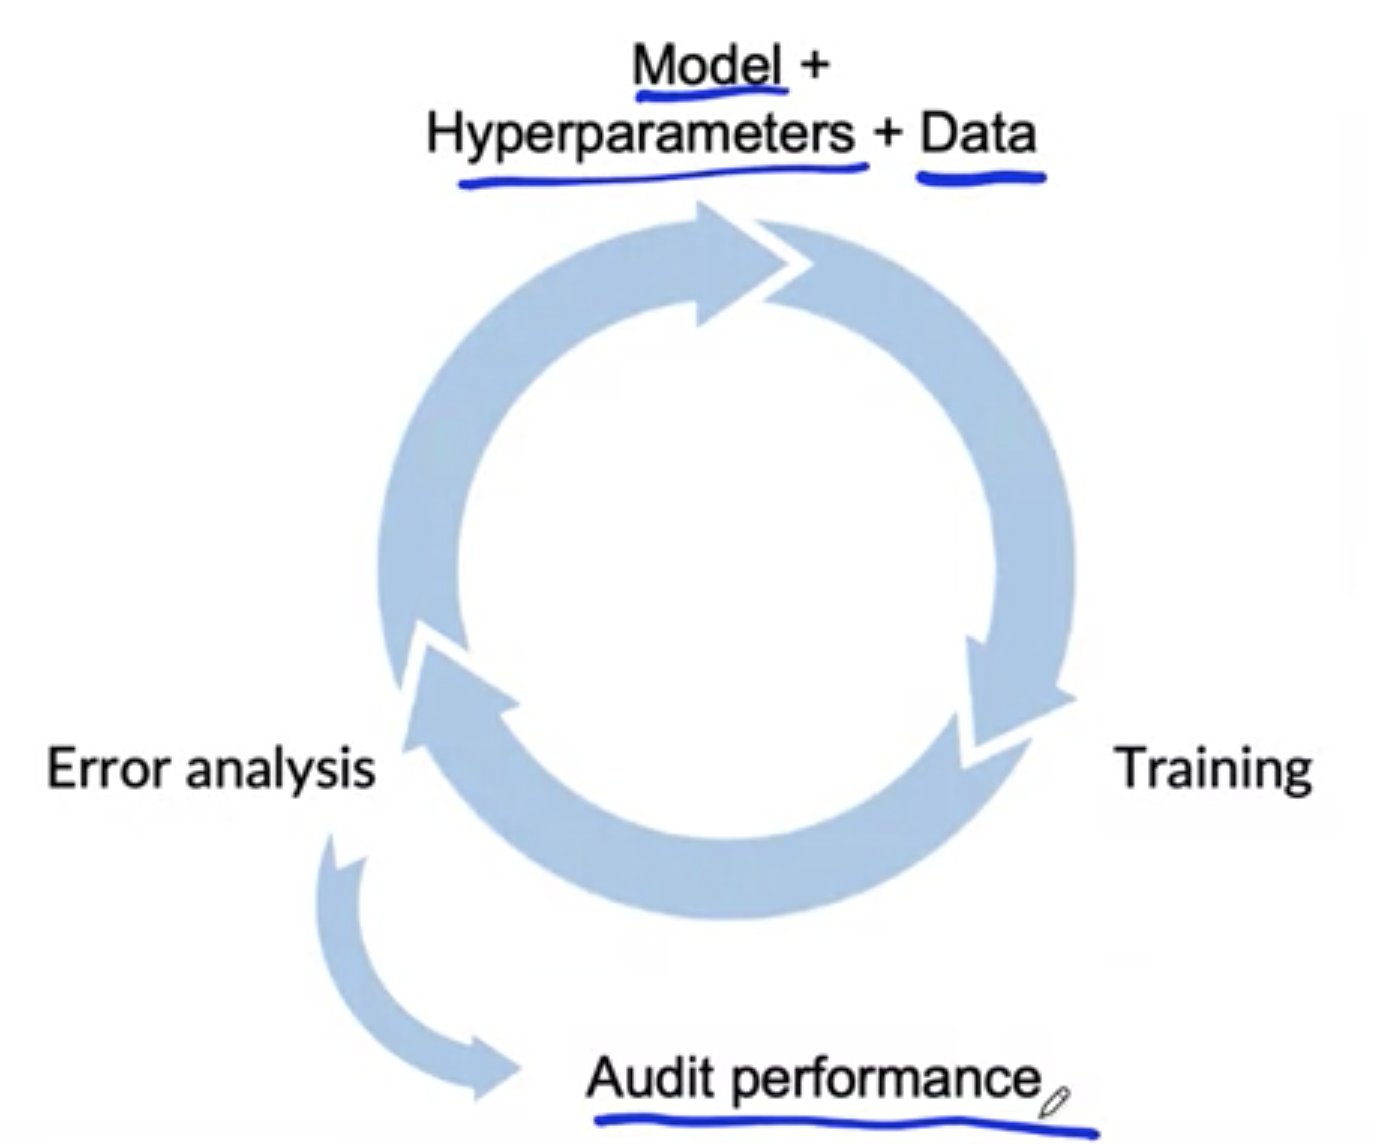

In [4]:

Image("model-dev.png")


To keep in mind while modeling:

1. Model does well on Training set, test set but ALSO VERY IMPORTANTLY achieves the business goals/metrics. This is often overlooked at by MLEs but should be focused on.

2. Performance on Key Slices:

Average Error is generally not the right metric to look at especially In Medical cases.

Another really good example is a Web Search Example where there are two type of queries:
- Info & Transactional queries like "Diwali Festival" - the ranking does not really matter here.
- Navigational queries like "Stanford", "Reddit" - it maybe important to have the most important website here.


Hence, it is important to check Performance on Key Slices while keeping in mind you are complying with regulations (For example: Gender in Loan Approvals)

3. How to establish a baseline for modeling:

    - in unstructured problems around text, speech and images, a HUMAN LEVEL PERFORMANCE (HLP) Baseline helps understand what is achievable and gives sense of irreducable error.
    - in structured problems like excel sheets, HLP is not preferred. 
    
    Some ways to establish baseline there:
     - State of art/open source literature review.
     - Do a quick and dirty implementation
     - Performance with previous model sysstem
     


Question: Do you care about Deployment constraints while modeling?


Only if the baseline is already established and goal is to deploy and build.
If this is the first pass, you should not care about deployment too much.

4. Another important thing to keep in mind is to test the model on a small sample before expanding to larger data.



### Error Analysis


#### 1. Examine/tag examples <> Propose Tags - important to look at the tags for the problem and have a brainstorming session for the same.

Examples:

Visual Inspection: 1. Scratch/Dent etc 2. Image properties: Brightness etc. 3. Phone model used.
Product Recommendation: By User Demographics, Product Features/Category

##### Metrics to look at within a tag:
1. Misclassified % within a tag.
2. % of a type of tags amongst incorrect predictions.
3. % of data with that tag
4. Room for improvement


| Tag     | Accuracy  | HLP| Gap   | % of Data| One Metric (Gap * % of Data)   |
| ----------- | ----------- |----------- | ----------- |----------- | ----------- |
| Car noise| 94%     | 95%  |1%       | 60%   |0.6% | 
| People noise| 90%     | 95%  |5%       | 4%   |0.2% | 

In the above example, Car Noise would be better to focus on since it would improve overall accuracy by 0.6%.

##### Some Other Metrics that cannot be computed but should be thought about:

1. How easy is it to improve the performance for a particular tag (For Eg. can you collect more data)
2. How important is a tag from a business perspective (Very Domain specific, for example car noise is important since people tend to use speech recog more in that case, in Finance - improving on identifying defaults is more vital)

##### Skewed Datasets: Like Medical, Manufacturing (less % of defects)

Important to look at F1 Score and Confusion Matrix there 
F1 Score - Harmonic Mean of Precision and Recall while providing more weight to the one that is lower.

### Audit Framework

1. Brainstorm what can go wrong:
 - Perfoormance on subsets
 - FP, FN
 - Rare Classes
 
 Important to work with Business Owner on this.
 
2. Also important to know the slices/subsets which would be domain specific.